# Inferences about variances of normally distributed data

The goal here is to compare the variance of two datasets that have the same mean. This is of practical application in real life when improving the precision of manufacturing process to reduce tolerance stacking. The improved process would have the same mean but reduced variance which is better for tolerance stacking when the product is subsequently used.

To do that we need to investigate first the chi squared distribution.

## Chi-square distribution
The $\chi_\nu^2$ distribution with $\nu$ degres of freedom is defined as $\chi_\nu^2 = \sum_{i=1}^{\nu}z_i^2$ where $z_i$s are independently identically distributed normal random variables of mean 0 and variance 1. Below is the chart, exhibiting typical skewness to the right. Also, you can see that the mean is $\nu$ and that the curve becomes almost normal as $\nu$ reaches 50. Note that the variance is 2$\nu$.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
pd.set_option('display.precision', 2)

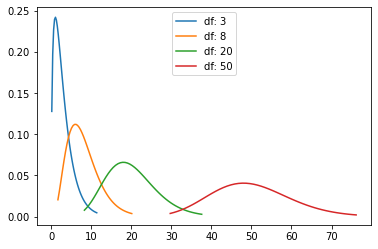

In [2]:
fig, ax = plt.subplots(1,1)
for df in [3,8,20,50]:
    x = np.linspace(st.chi2.ppf(0.01,df), st.chi2.ppf(0.99,df))
    y = st.chi2.pdf(x,df)
    ax.plot(x,y,label=f'df: {df}')
plt.legend(loc='upper center')

## Distribution of sample variances calculated from normally distributed data

Now if $y_i$s are n independent, normally distributed random variables having mean $\eta$ and variance $\sigma^2$, we can say that $\frac{\sum(y_u-\eta)^2}{\sigma^2} \sim \chi_n^2$. 

Therefore $\frac{(n-1)s^2}{\sigma^2} \sim \chi_{n-1}^2$. The distribution of $s^2$ is called chi-square with scale factor $\sigma^2/(n-1)$.

In the same way, if we want to know the limits A and B for which Pr{ A < $\frac{(n-1)s^2}{\sigma^2}$ < B} = 1 - $\alpha$, we can look up values in a table of $\chi_{n-1}^2$ and, with some manipulations, say that Pr{ $\frac{(n-1)s^2}{B}$ < $\sigma^2$ < $\frac{(n-1)s^2}{A}$} = 1 - $\alpha$

In [3]:
s_sq = 13
n=6 # size of random sample
s_sq_null = 10 # against the alternative that s_sq > 10
chi_stat = 5*13/10
critical_value = st.chi2.ppf(0.95,n-1)
print(f'results at 5%: chi_stat is {chi_stat}, critical_value is {critical_value}')
print('statistics is below the critical value so we fail to reject the null hypothesis')

results at 5%: chi_stat is 6.5, critical_value is 11.070497693516351
statistics is below the critical value so we fail to reject the null hypothesis


In [4]:
# we can also compute a confidence interval at 90%
# we first find the value A and B
A = st.chi2.ppf(0.05,n-1)
B = st.chi2.ppf(0.95,n-1)
print(f'the confidence interval at 90% for variance is {(n-1)*s_sq/B} and {(n-1)*s_sq/A}')
# we can also compute a confidence interval at 95%
# we first find the value A and B
A = st.chi2.ppf(0.025,n-1)
B = st.chi2.ppf(0.975,n-1)
print(f'the confidence interval at 95% for variance is {(n-1)*s_sq/B} and {(n-1)*s_sq/A}')

the confidence interval at 90% for variance is 5.871461410273225 and 56.74495770503657
the confidence interval at 95% for variance is 5.065263191093949 and 78.19909989869623


## Ratio of two variances

If there are $n_1$ observations randomly drawn from normal population of variance $\sigma_1^2$ and $n_2$ observations randomly drawn from normal population of variance $\sigma_2^2$, then $s_1^2/\sigma_1^2$ is distributed as $\chi_{\nu_1}^2/\nu_1$ and $s_2^2/\sigma_2^2$ is distributed as $\chi_{\nu_2}^2/\nu_2$ where $\nu_1 = n_1 - 1$ and $\nu_2 = n_2 - 1$.

The ratio $(\chi_{\nu_1}^2/\nu_1)/(\chi_{\nu_2}^2/\nu_2)$ has an F distribution having $\nu_1$ and $\nu_2$ degrees of freedom and can be looked up in a table. We can do hypothesis testing on a specific value or confidence intervals on the ratio of variance. A special and interesting case is when we want to test that the two variances $\sigma_1^2$ and $\sigma_2^2$ are equal.

Note the importance of the assumption that the underlying distributions are normally distributed. If not the case, it is useful to convert the test of variance to a test of mean (t test or ANOVA) which are way less sensitive to the normality assumptions. To do this, we do our tests on the log of the variance data which is much more normally distributed than the variance data itself as shown below.

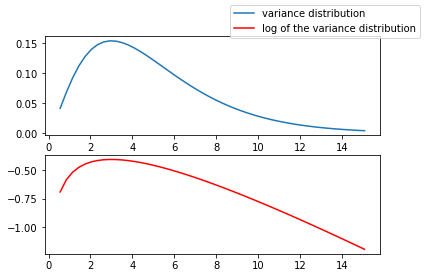

In [5]:
fig, ax = plt.subplots(2)
df=5
x = np.linspace(st.chi2.ppf(0.01,df), st.chi2.ppf(0.99,df))
y1 = st.chi2.pdf(x,df)
y2 = np.log(y1)/np.log(100)
ax[0].plot(x,y1,label=f'variance distribution')
ax[1].plot(x,y2,c='r',label=f'log of the variance distribution')
plt.figlegend()

In [6]:
# let's take an example where two analysts each perform five tests on identical repeated samples
df = pd.DataFrame({
        'week':[1,2,3,4,5],
        's1_sq': [.142,.091,.214,.113,.082],
        's2_sq': [.043,.079,.107,.027,.045]
})
df = df.set_index('week')
df['diff'] = np.log(100*df['s1_sq'])/np.log(10) - np.log(100*df['s2_sq'])/np.log(10)
df

,s1_sq,s2_sq,diff
week,,,
1,0.14,0.04,0.52
2,0.09,0.08,0.06
3,0.21,0.11,0.30
4,0.11,0.03,0.62
5,0.08,0.04,0.26


In [7]:
# now we assume that the 'diff' values are random sample from a normally distribution of unknow variance
# therefore we can compute the t statistic
d_bar = df['diff'].mean()
sd = math.sqrt((1/4)*sum((df['diff']-df['diff'].mean())**2))
t = (df['diff'].mean() - 0) / (sd/math.sqrt(5))
critical_value = st.t.ppf(0.975,4)
print(f'sample mean is {d_bar:.03f}, sample standard dev is {sd:.03f}, t stat is {t:.03f}, critical value at 5% is {critical_value:.03f}')

sample mean is 0.353, sample standard dev is 0.221, t stat is 3.563, critical value at 5% is 2.776


The t statistic 3.563 is greater than the critical value for t statistics with 4 degrees of freedom (2.776), hence there is a difference between the two analysts and analyst two is probably more accurate.